# SUPINFO : TP sur le machine Learning : Prédiction du prix des maisons (California Housing Dataset)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.datasets import fetch_california_housing

# Chargement du dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df["PRICE"] = california.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## 1. Exploration des données

Aperçu des données :
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  

Statistiques descriptives :
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.8461

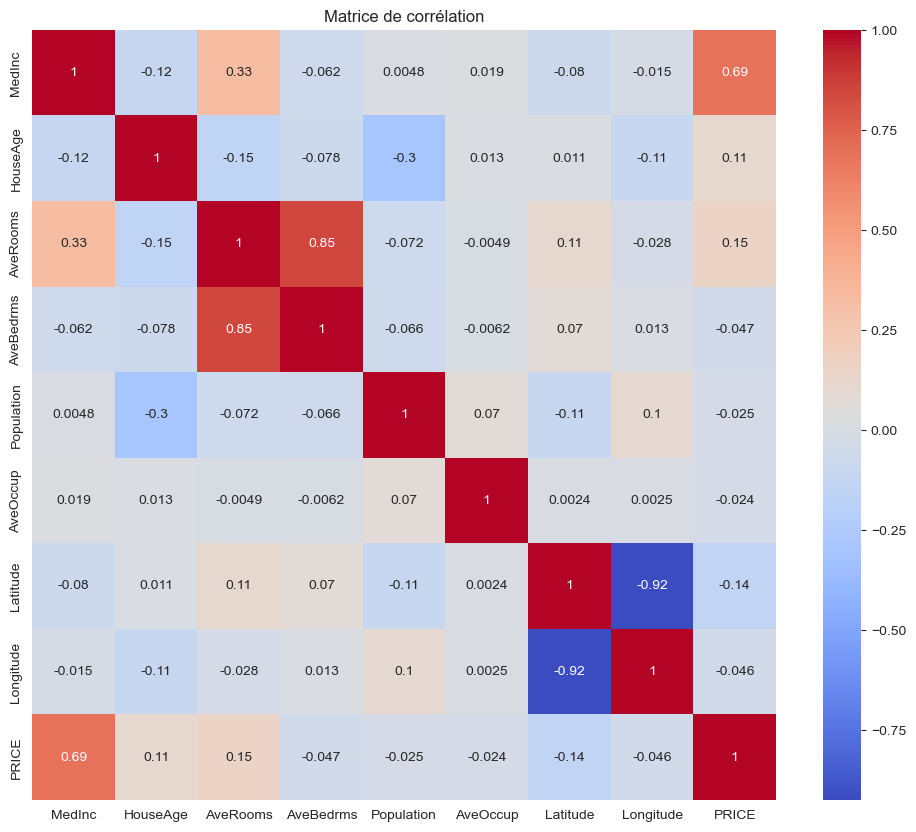

In [5]:
print("Aperçu des données :")
print(df.head())

print("\nStatistiques descriptives :")
print(df.describe())

print("\nVérification des valeurs manquantes :")
print(df.isnull().sum())

# Matrice de corrélation
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

## 2.Préparation des données

In [6]:
X = df.drop("PRICE", axis=1)
y = df["PRICE"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3.Régression Linéaire

In [8]:
import numpy as np
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score :", r2_score(y_test, y_pred))

MAE : 0.5332001304956556
MSE : 0.5558915986952442
RMSE : 0.7455813830127763
R2 score : 0.575787706032451


###  Visualisation des résultats

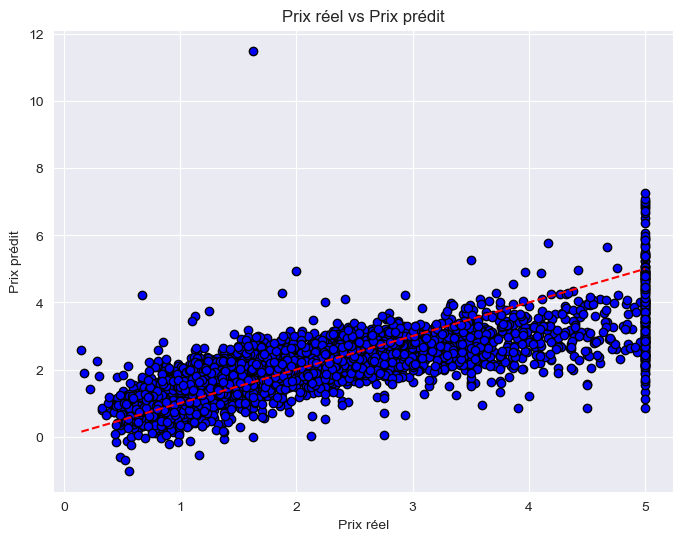

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Prix réel")
plt.ylabel("Prix prédit")
plt.title("Prix réel vs Prix prédit")
plt.show()

## 4. Modèle Random Forest

In [10]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("MAE :", mean_absolute_error(y_test, rf_pred))
print("R² score :", r2_score(y_test, rf_pred))

from joblib import dump
dump(rf_model, 'rf_model.joblib')
from joblib import load
rf_model = load('rf_model.joblib')

MAE : 0.32754256845930246
R² score : 0.8051230593157366


## 5. Pipeline avec StandardScaler

In [12]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LinearRegression())
])
pipeline.fit(X_train, y_train)
pipe_pred = pipeline.predict(X_test)

print("R² score (pipeline) :", r2_score(y_test, pipe_pred))

R² score (pipeline) : 0.575787706032451
